In [3]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [4]:
faces_all = fetch_olivetti_faces()

In [5]:
X = faces_all.data
y = faces_all.target

In [6]:
print(X.shape)
#print(y)

(400, 4096)


In [7]:
print(X[0])

[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]


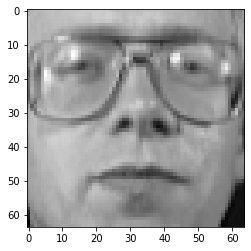

In [8]:
plt.imshow(X[11].reshape(64,64), cmap="gray")

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(200, 4096)
(200, 4096)
(200,)
(200,)


In [10]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train) 

C:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
np.mean(log_reg.predict(X_test) == Y_test)

0.875

In [12]:
pca = PCA(n_components=50)   # 4096 -> 140
pca.fit(X_train)

print(X_train.shape)

lowX = pca.transform(X_train)
print(lowX.shape)

(200, 4096)
(200, 50)


In [13]:
recon = pca.inverse_transform(lowX)

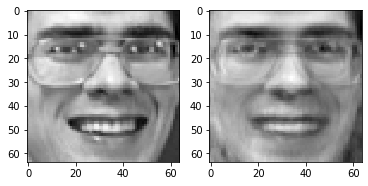

In [14]:
plt.subplot(121)
plt.imshow( X_train[123].reshape(64,64), cmap='gray')
plt.subplot(122)
plt.imshow( recon[123].reshape(64,64), cmap='gray')

In [15]:
log_reg.fit(lowX, Y_train)

C:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
#pca = PCA(n_components=50)   # 4096 ->  50
#pca.fit(X_test)
lowX_test = pca.transform(X_test)
np.mean(log_reg.predict(lowX_test) == Y_test)

0.905

In [17]:
print(pca.singular_values_)

[61.547043  48.278572  37.100403  28.656218  24.568857  22.012415
 19.943518  18.233646  16.956291  16.076084  15.87236   15.118712
 14.8409395 13.632701  12.846218  12.401     12.067913  11.823137
 11.705341  10.885612  10.8004055 10.446771  10.039682   9.617954
  9.421475   9.342782   8.763449   8.71578    8.507133   8.2125025
  8.114982   7.9010897  7.5718846  7.4747634  7.26076    7.1543636
  7.017874   6.9796877  6.8182116  6.7119975  6.609949   6.569042
  6.422281   6.3240833  6.195069   5.9960785  5.9570494  5.895544
  5.8257904  5.700625 ]


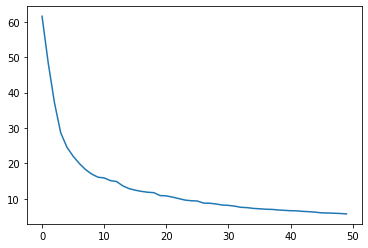

In [18]:
plt.plot(pca.singular_values_)

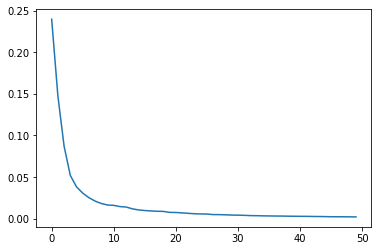

In [19]:
plt.plot(pca.explained_variance_ratio_)

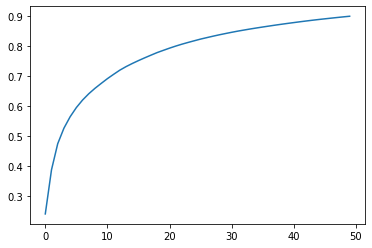

In [20]:
cs = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cs)

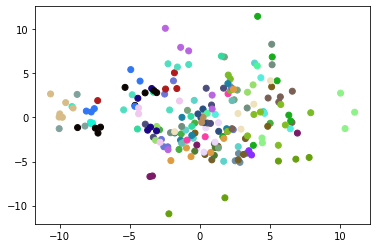

In [21]:
col =  np.random.rand(40,3)
colors = [col[i]  for i in Y_train ]
plt.scatter(lowX[:,0], lowX[:,1], c=colors)

(200, 2)
(200, 1)


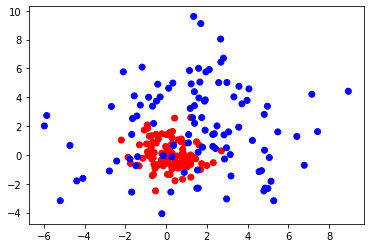

In [22]:
samples = 100

x_data0 = np.random.normal(0, 1, size=[samples,2])  # r == 0 
x_data1 = np.random.normal(2, 3, size=[samples,2])  # b == 1
x_data = np.vstack([x_data0, x_data1])
print(x_data.shape)

y_data = np.vstack([np.zeros(samples).reshape(samples,1) , np.ones(samples).reshape(samples,1) ]) 
print(y_data.shape)

colors = ["red"  if i == 0  else  "blue"  for i  in y_data   ]

plt.scatter(x_data[:,0], x_data[:,1], color=colors)

In [23]:
model = KMeans(n_clusters=2, init="random", max_iter=6).fit(x_data)
print(model.cluster_centers_)

[[ 0.21285594 -0.17256706]
 [ 2.36141358  3.78495132]]


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1
 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0]


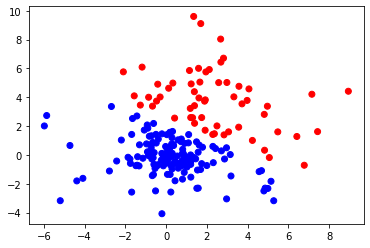

In [24]:
d = ['blue', 'red']
print(model.labels_)
colors = [  d[i] for i in model.labels_]
plt.scatter(x_data[:,0], x_data[:,1], color=colors)

In [25]:
model = KMeans(n_clusters=40, init="random", max_iter=6).fit(X)

print(model.labels_)
print(y)

[28  5 14  1 34  1 28  1 28 12 23 19 23 23 23 19 23 23 19 23 21  5  5 35
 35  9  8 35 34 34 37 37  9 34 34  1 37 37 27  5 21 21 21 21  1  1  8  9
  1  1 28 28 28 28 28 28 28 28 28 28 29 29  1 29 29 34 20 29  1 29 20 26
 20  5 20 20  5 20  1  5 31 21 31  8  8  8  8  8  8 21 26 26 26 26 14 26
 26 14  1 20 33 33 33 33 33 33 33 33 33 33 14 31 31 31 31 14 31 14 14 14
 37 37 37  8 37 37 35 35 34 37  6  6  6  6  6  6  6  6  6  6 37 37 37 37
 37 37 37 37 37 37 36 36 36 14 20 36 19  1 36 36  8  8  6  6  8 32 32  8
 32 32 34 34 34 34 34 34 34 34 34  1 39 39 39 20 20 39 20 20 20 39 22 22
 22 21 30 37 30 30 30 22 11 11 11 27 27 27 35 35 27 35  4  4  4  4 25  4
 25 25  4 25 34 34 21  8 21  8  8 34  1  1 36 36 38 38 11 36 36 36 38 38
  6  5  6 37 37  6  6  8  6  6 15 15  6  2  2 15 34  2 15  6  6  6  6  6
  6  6  6  6  6  6 10 18 13 10 18 10 18 10 18 13  4  4  4 27 35 35 35 35
  4  4 21 11 21 11 11 21 11 11 21 21  7  3  3  3  3  7  7  7  7  3  0  0
  0  0  0  0  0  0  0  0 24 24 24 24 24 24 24 24 24

In [26]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [27]:
pca = PCA(n_components=1)  
pca.fit(X)
pca.explained_variance_ratio_

array([0.92461872])

In [28]:
low = pca.transform(X)

In [29]:
model = KMeans(n_clusters=6, init="random", max_iter=6).fit(low)

In [30]:
model.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 1, 5, 3, 5, 1, 5, 3, 1, 3, 3, 1, 3, 1, 3, 1,
       1, 3, 1, 3, 5, 3, 5, 1, 1, 1, 5, 5, 1, 3, 3, 3, 3, 5, 1, 1, 5, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 2, 5, 2, 2, 2, 0, 1, 0, 2, 0,
       5, 2, 2, 5, 5, 2, 2, 0, 0, 5, 2, 5, 0, 5, 2, 2, 5, 5, 2, 2, 0, 0,
       2, 5, 2, 0, 2, 2, 5, 2, 2, 2, 5, 2, 2, 2, 5, 2, 2, 5])

In [34]:
col =  ['red', 'blue', 'black', 'yellow', 'cyan', 'green']
colors = [col[i]  for i in model.labels_ ]
plt.scatter(low[:,0], low[:,1], c=colors)

IndexError: index 1 is out of bounds for axis 1 with size 1

In [35]:
col =  ['red', 'blue', 'black']
colors = [col[i]  for i in model.labels_ ]
plt.scatter(low[:,0], low[:,1], c=colors, marker='*')

col =  ['red', 'black', 'blue']
colors = [col[i]  for i in y ]
plt.scatter(low[:,0], low[:,1], c=colors, marker='^')


IndexError: list index out of range

In [36]:
print(low.shape)
reconX = pca.inverse_transform(low)
print(reconX.shape)

print(X[0:10])
print(reconX[0:10])

(150, 1)
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[[4.87332632 3.28420238 1.45858847 0.23764012]
 [4.86247892 3.28673941 1.4328746  0.22688569]
 [4.79929088 3.30151808 1.2830867  0.16423922]
 [4.85120324 3.28937661 1.40614547 0.21570665]
 [4.85721176 3.28797132 1.42038875 0.22166368]
 [5.01906124 3.25011732 1.8040546  0.38212597]
 [4.82402881 3.29573228 1.34172822 0.18876513]
 [4.89427975 3.27930171 1.50825879 0.25841396]
 [4.80023332 3.30129766 1.28532076 0.16517358]
 [4.87743522 3.28324137 1.46832867 0.2417138 ]]


In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

tree = DecisionTreeClassifier(max_depth=7)

iris = load_iris()
X = iris.data
y = iris.target
tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
tree.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="iris.dot", feature_names=iris.feature_names,  class_names=iris.target_names, rounded=True, filled=True, impurity=True)


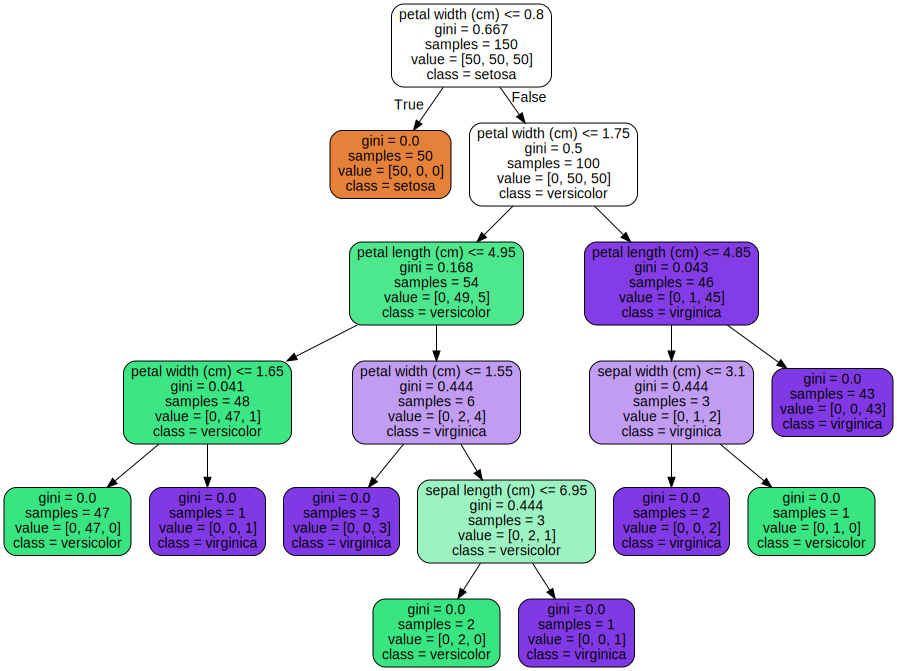

In [40]:
import pydot
graph = pydot.graph_from_dot_file("iris.dot")[0]
import graphviz
with open("iris.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))



In [41]:
# lowX
X = faces_all.data
y = faces_all.target
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5)

In [42]:
pca = PCA(n_components=100)   
pca.fit(X_train)

lowX = pca.transform(X_train)
lowX_test = pca.transform(X_test)

tree = DecisionTreeClassifier(max_depth=20)
tree.fit(lowX, Y_train)
print(np.mean(tree.predict(lowX) == Y_train))
print(np.mean(tree.predict(lowX_test) == Y_test))

1.0
0.455


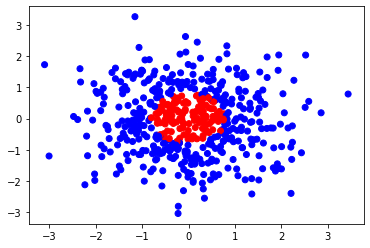

In [43]:
samples = 500
x_data = np.random.normal(0, 1, size=[samples,2])
d = np.sqrt([x[0]**2+x[1]**2  for x in x_data ])
y_data = np.array([0  if   i < 0.8   else   1 for i  in d   ]).reshape(samples, 1)
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors)

In [44]:
log_reg = LogisticRegression()
log_reg.fit(x_data, y_data)

C:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
log_reg.score(x_data, y_data)  #  np.mean(log_reg.predict(x_data) == y_data)


0.75

In [46]:
log_reg.predict(x_data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

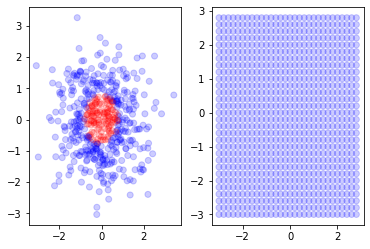

In [47]:
plt.subplot(1,2,1)  
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=0.2)


xx, yy = np.mgrid[-3.0:3:0.2, -3.0:3.0:0.2]
grid = np.c_[xx.ravel(), yy.ravel()]

p = log_reg.predict(grid)
plt.subplot(1,2,2)  

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

In [48]:
from sklearn.svm import SVC     
model = SVC(kernel='poly', degree=2).fit(x_data, y_data) 

C:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


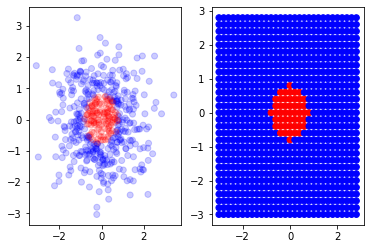

In [49]:
plt.subplot(1,2,1)  
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=0.2)

xx, yy = np.mgrid[-3.0:3:0.2, -3.0:3.0:0.2]
grid = np.c_[xx.ravel(), yy.ravel()]

p = model.predict(grid)
plt.subplot(1,2,2)  

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=1)

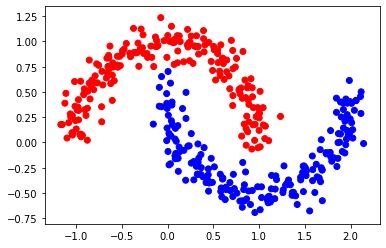

In [50]:
from sklearn.datasets import make_moons
x_data, y_data= make_moons(n_samples=400, noise=0.1, random_state=0)

colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=1.0)


In [51]:
model = SVC(kernel='rbf').fit(x_data, y_data) 

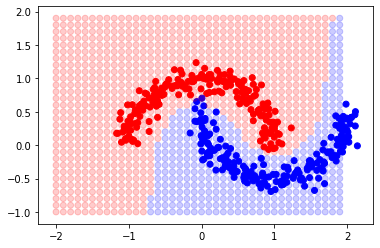

In [52]:
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=1.0)

xx, yy = np.mgrid[-2.0:2:0.1, -1.0:2.0:0.1]
grid = np.c_[xx.ravel(), yy.ravel()]

p = model.predict(grid)

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

NameError: name 'X2' is not defined